# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")



In [102]:
data = pd.read_csv('/Users/aleksandrgrisenkin/Desktop/df/3. Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости/3. Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости.csv', sep='\t')

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [103]:
data.head(5)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


В каждой строке таблицы — данные о недвижимости.

В столбце is_apartment почти все строки с отстуствием занчений,  2725 значений False и всего 50 True - это очень мало а так же это буливое значение, а пайтон распознал его как строковое . 

столбец first_day_exposition нужно привести к нормальному виду,а то сейчас дата не очень наглядна.

In [104]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S' # привели дату к нормальному виду
) 

In [105]:
data['is_apartment']=data['is_apartment'].astype('bool') # перевели is_apartment в тип bool


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [107]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод


В таблице 22 столбца и 23698 строк, в 11 столбцах есть пропущенные значения, нужно посмотреть на важность пропущенных значений и понять как их восстановить.

Тип данных в столбцах это object, float, int, bool.



## Предобработка данных

In [108]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

13 столбцов с пропущенными значениями! Не мало

обязательно нужно заполнить следующие:

living_area - сгруппируем по количеству комнат и добавим данные (медиану) по площади 

kitchen_area   сгруппируем по количеству комнат и добавим данные (медиану) по кухне 


balcony - поставим 0 в отсутсвующих значениях

airports_nearest заполним данные медианой по airports_nearest 


cityCenters_nearest - заполним данные медианой по cityCenters_nearest 
   
locality_name - 49 пропущенных значений - их можно удалить это 0,2 % это не повлияет на результаты иследования

days_exposition - скорее всего обявление еще в продаже поэтому нет данных.


In [109]:
data['balcony'] = data['balcony'].fillna('0') #заполнили пропуски балкона


In [110]:
for room in data['rooms'].unique():   # заполнили пропуски kitchen_area и living_area
    
    median_kitchen_area = data.loc[data['rooms'] == room, 'kitchen_area'].median()
    data.loc[(data['kitchen_area'].isna()) & (data['rooms'] == room), 'kitchen_area'] = median_kitchen_area
    
    median_living_area = data.loc[data['rooms'] == room, 'living_area'].median()
    data.loc[(data['living_area'].isna()) & (data['rooms'] == room), 'living_area'] = median_living_area
    

Проверим что получилось 

In [111]:
display(data['kitchen_area'].isna().sum())
display(data['living_area'].isna().sum())

197

0

197 значений остались не заполненными, проверим это студии или нет 

In [112]:
data.query('kitchen_area > 0 and rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Это говорит о том что в студиях нет кухни, что логично.


уберем лишние слова в locality_name

In [113]:
locations =['поселок', 'посёлок','деревня', 'село', 'садовое товарищество','городского типа', 'городской', 'коттеджный' ] # создадим список со словами которые хотим удалить

for location in locations: # с помощью цикла удалим ненужнеы значения
    data['locality_name'] = data['locality_name'].str.replace(location, '')
    

In [114]:
#заполним данные медианой по airports_nearest 
data.loc[data['airports_nearest'].isna(),'airports_nearest'] = data['airports_nearest'].median()

In [115]:
#заполним данные медианой по cityCenters_nearest 
data.loc[data['cityCenters_nearest'].isna(),'cityCenters_nearest'] = data['cityCenters_nearest'].median() 

In [116]:
#заполним данные медианой по ceiling_height
data.loc[data['ceiling_height'].isna(),'ceiling_height'] = data['ceiling_height'].median() 

In [117]:
data.loc[data['days_exposition'].isna(),'days_exposition'] = data['days_exposition'].median() 

In [118]:
data.dropna(subset = ['locality_name'], inplace = True) #удалили 49 значений


## Расчёты и добавление результатов в таблицу

In [119]:
data['price_one_m2'] = data['last_price']/ data['total_area'] #добавили стоимость кв м
#data['price_one_m2'] = data['price_one_m2'].astype('int')

In [120]:
data['day_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year
#  добавили день недели, месяц и год публикации объявления

In [121]:

def floors (floor):
    if floor['floor'] == 1:
        return 'первый'
    elif floor['floor'] == floor['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['type_floor'] = data.apply(floors, axis = 1)

# добавили этаж квартиры; варианты — первый, последний, другой;

In [122]:
#соотношение жилой и общей площади, а также отношение площади кухни к общей.
data['ratio_area'] = data['living_area']/ data['total_area']
data['ratio_kitchen'] = data['kitchen_area']/ data['total_area']


## Исследовательский анализ данных

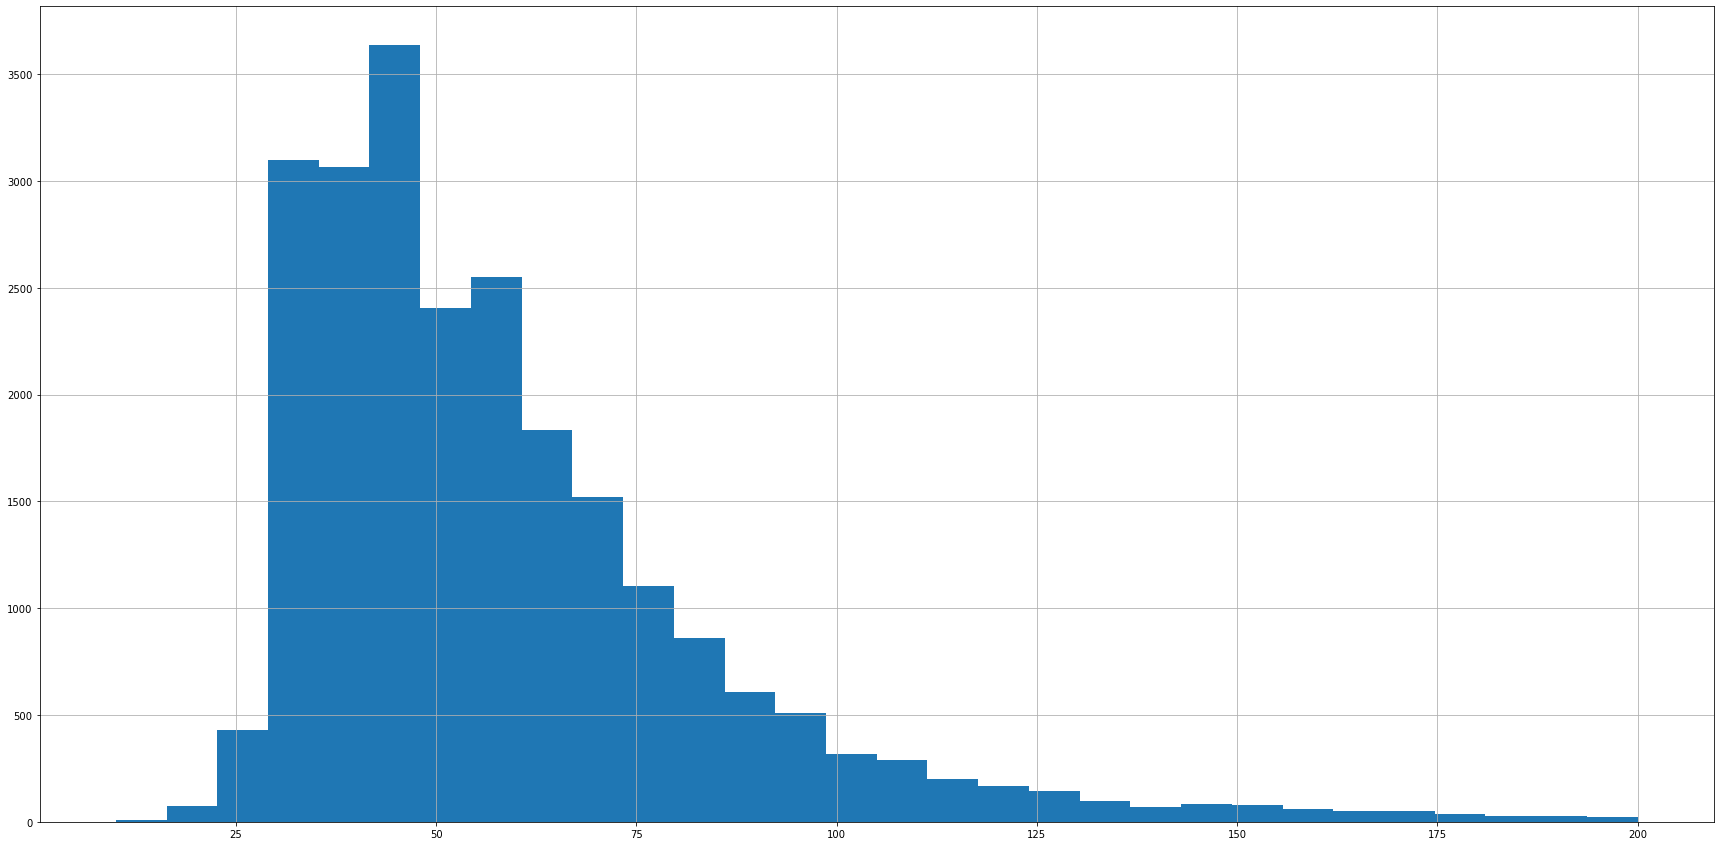

In [150]:
data['total_area'].hist(range = (10,200), bins = 30, figsize = (30,15))
plt.show()

можно сказать что значения до 20 метров и больше 200 очень редкие и ими можно принебречь 

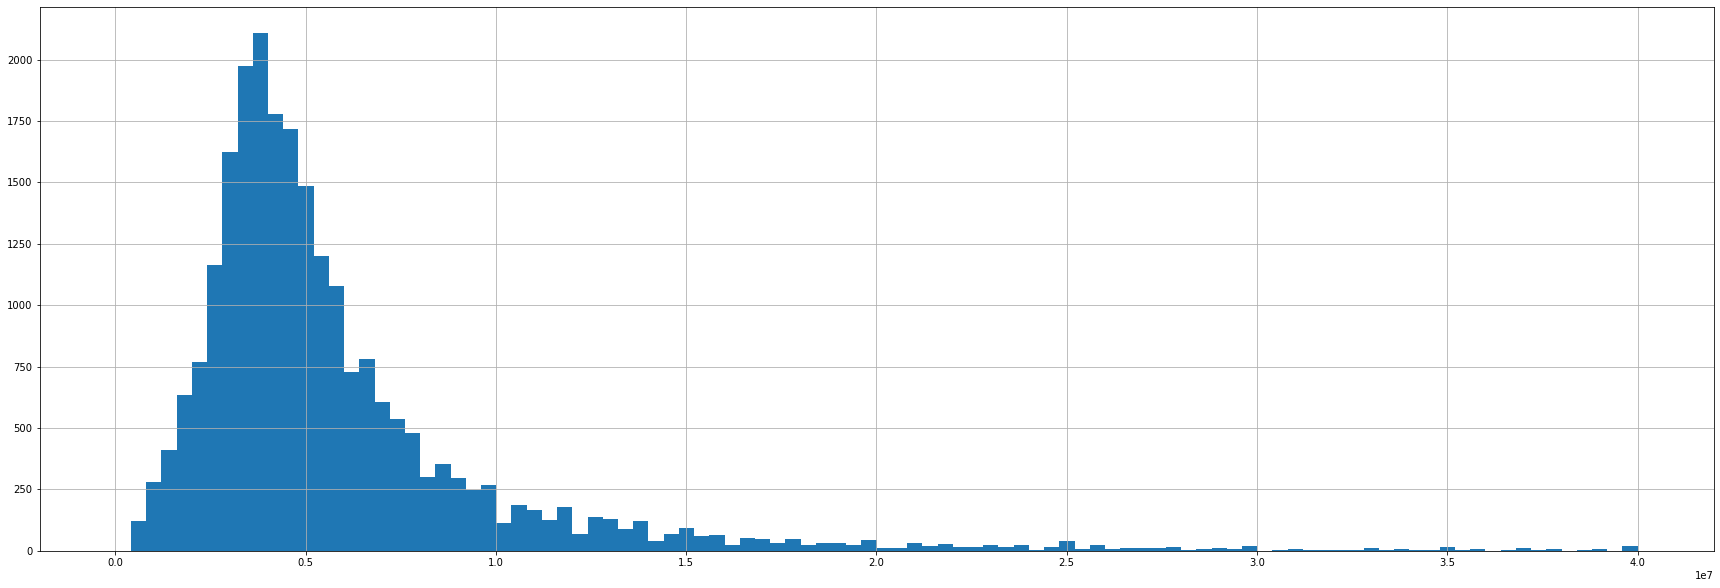

In [151]:
data['last_price'].hist(range = (12600, 40000000 ),bins = 100, figsize = (30,10))
plt.show()

осноной пик разброса цен равен 4 млн, значения после 15 млн можно отбросить 

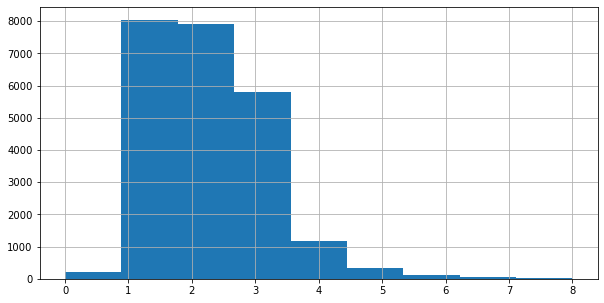

In [161]:
data['rooms'].hist(range = (0,8), bins = 9, figsize = (10,5))
plt.show()

на гистограмме видно, что боьше всего продается 1 и 2х комнатные квартиры 

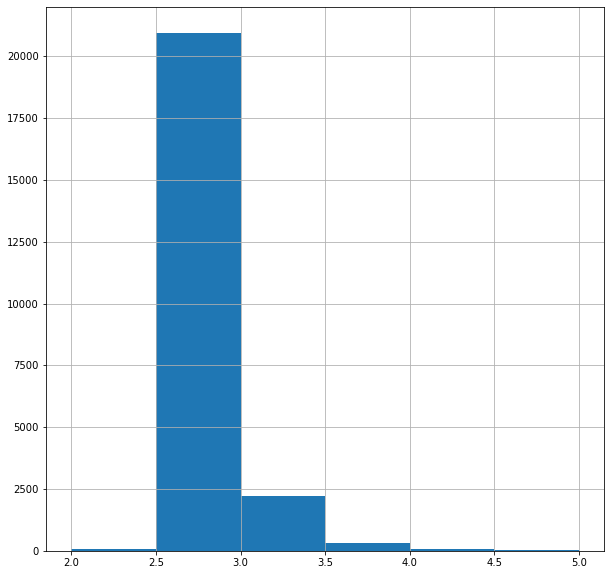

In [165]:
data['ceiling_height'].hist(range = (2,5), bins = 6, figsize = (10,10))
plt.show()

больше всего знаений с высотой потолка 2,7 м, значеня выше 3,6 м можно убрать 

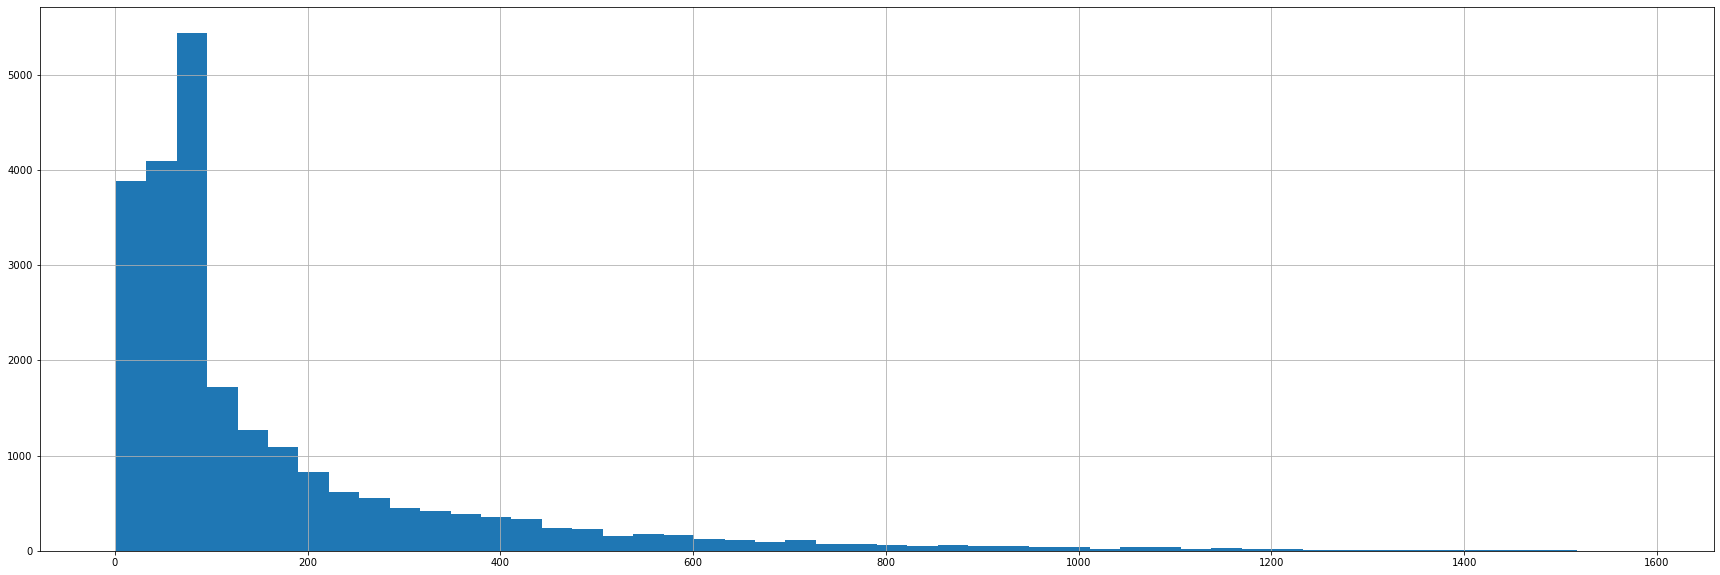

In [166]:
data['days_exposition'].hist(bins = 50, figsize = (30,10))
plt.show()

пик на графике знаении в 90-100 дней, все что больше 800 дней можно отбросить

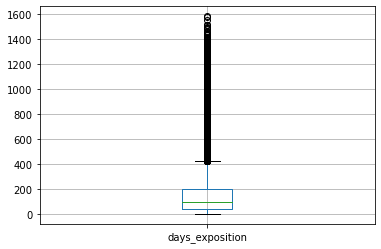

In [167]:
data.boxplot(column = 'days_exposition')
plt.show()

In [129]:
data['days_exposition'].describe()

count    23650.000000
mean       169.222748
std        206.550577
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

по столбцу "время продажи квартиры" можно сказать что обычно продажа занимает от 1 до 198 дней.

Можно считать, что продажи прошли очень быстро если продали за 45 дней, а  необычно долго если больше 198 дней

In [130]:
data_query = data.query('(1000000<last_price < 15000000 and days_exposition<600 ) and (total_area<200 and rooms<=6)')
data_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21065 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21065 non-null  int64         
 1   last_price            21065 non-null  float64       
 2   total_area            21065 non-null  float64       
 3   first_day_exposition  21065 non-null  datetime64[ns]
 4   rooms                 21065 non-null  int64         
 5   ceiling_height        21065 non-null  float64       
 6   floors_total          20988 non-null  float64       
 7   living_area           21065 non-null  float64       
 8   floor                 21065 non-null  int64         
 9   is_apartment          21065 non-null  bool          
 10  studio                21065 non-null  bool          
 11  open_plan             21065 non-null  bool          
 12  kitchen_area          20875 non-null  float64       
 13  balcony         

убрали все анамальные значения с помощью среза.

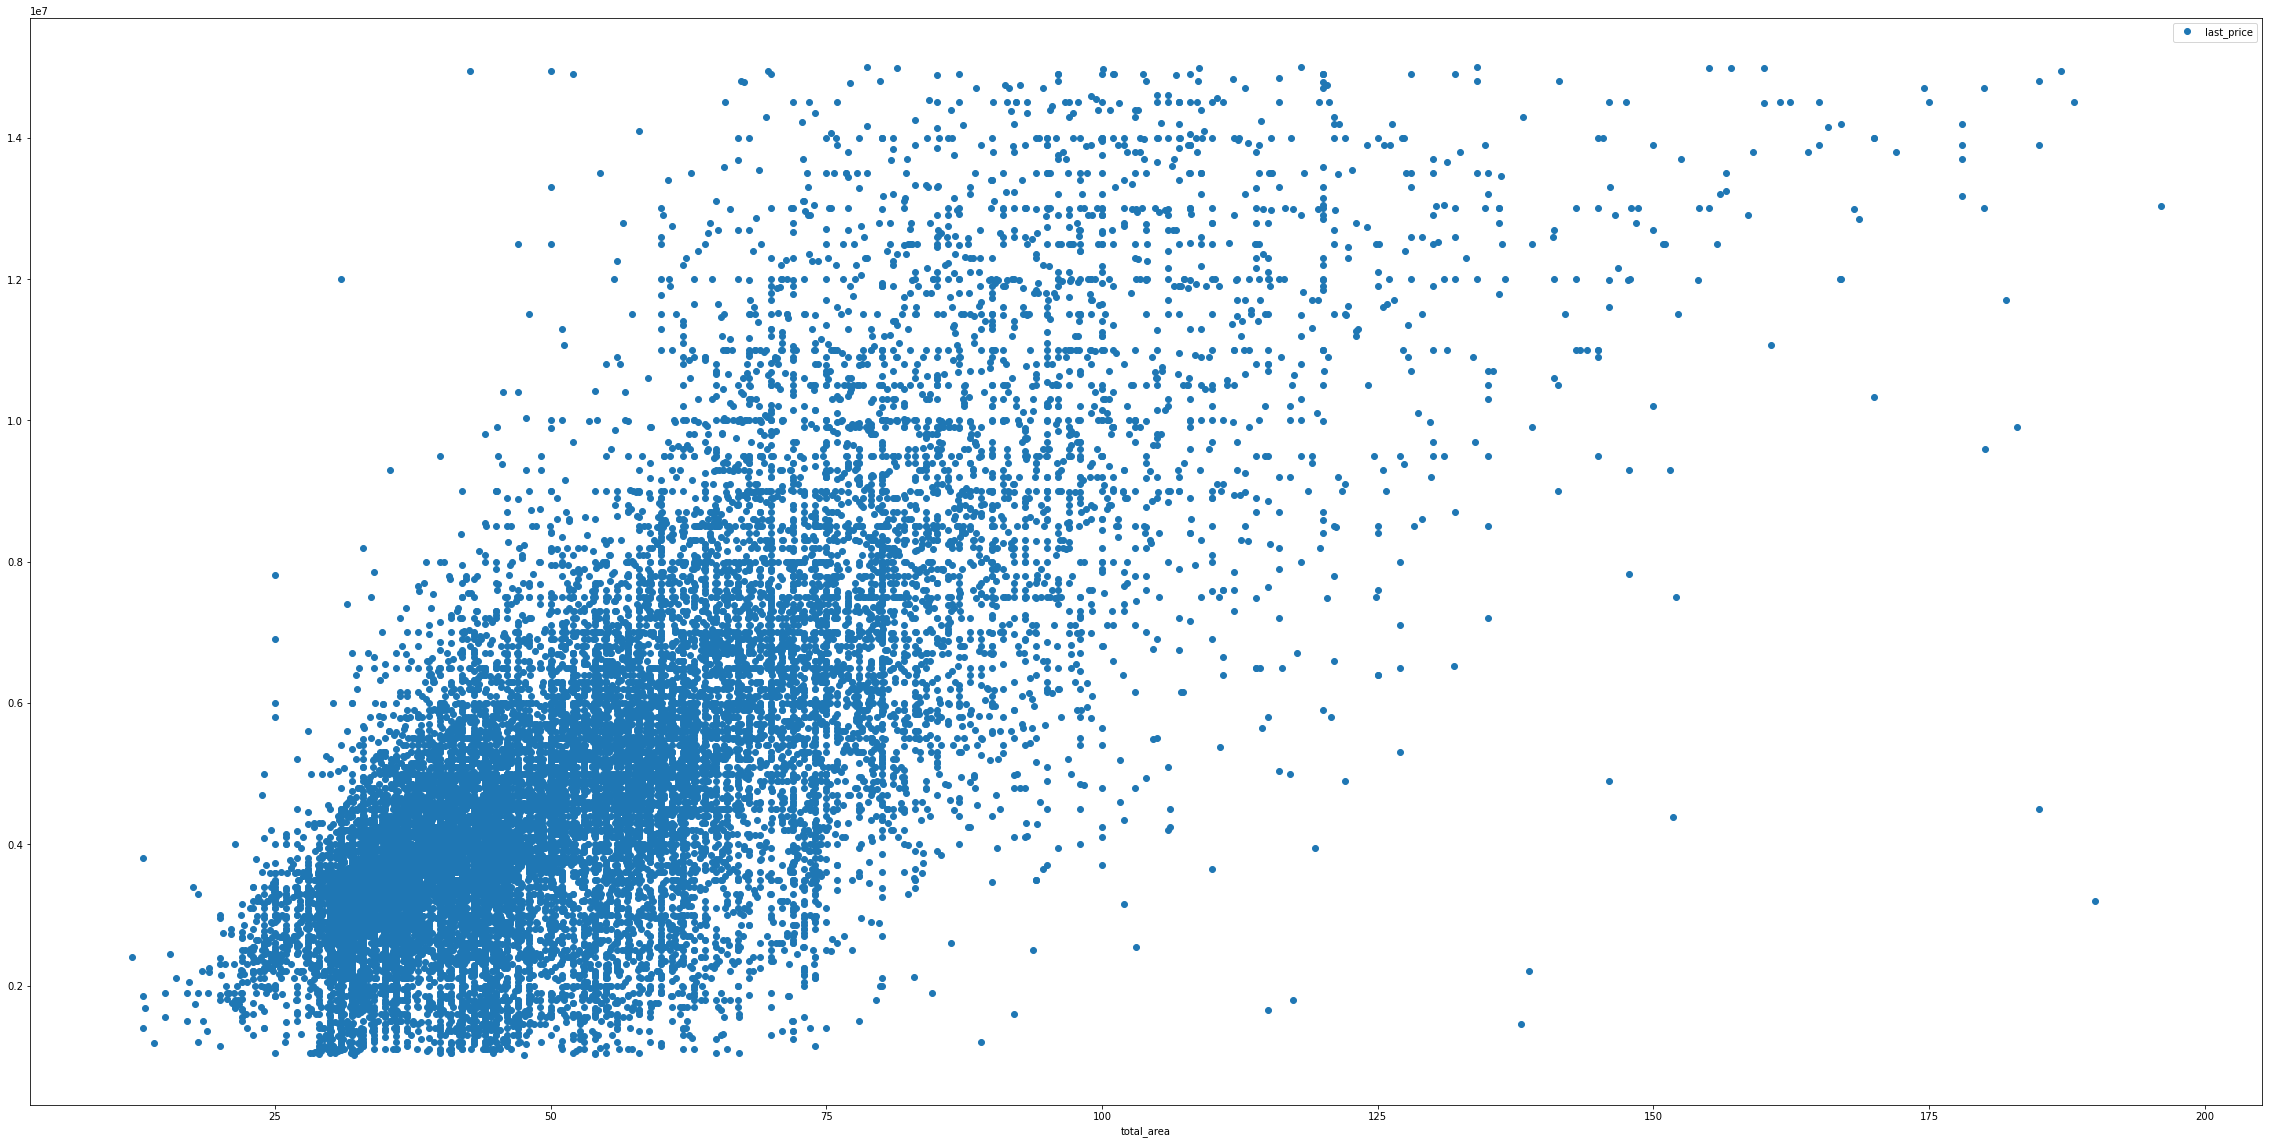

In [168]:
data_query.plot( x = 'total_area', y = 'last_price', style = 'o', figsize=(40,20))
plt.show()

на графике видна зависимость, чем больше площадь, тем выше цена!

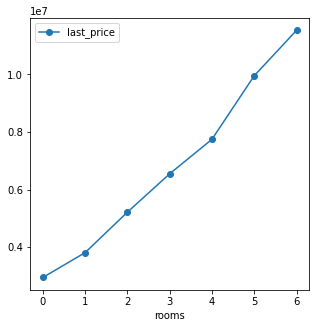

In [169]:
data_query.pivot_table(index ='rooms', values = 'last_price').plot(style='o-', figsize=(5, 5))
plt.show()

на графике видна прямая зависимость цены от количества комнат.


<AxesSubplot:xlabel='type_floor'>

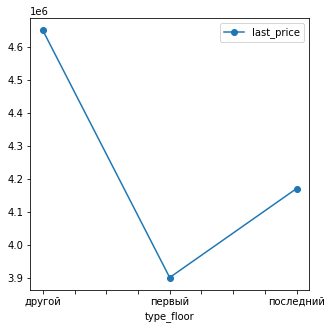

In [133]:
data_query.pivot_table(index = 'type_floor', values = 'last_price', aggfunc = 'median').plot(style='o-', figsize=(5, 5))

От этажа цена тоже зависит, на первом этаже цена дешевле! последний этаж тоже уступает стоимости квартире на "другом" этаже.

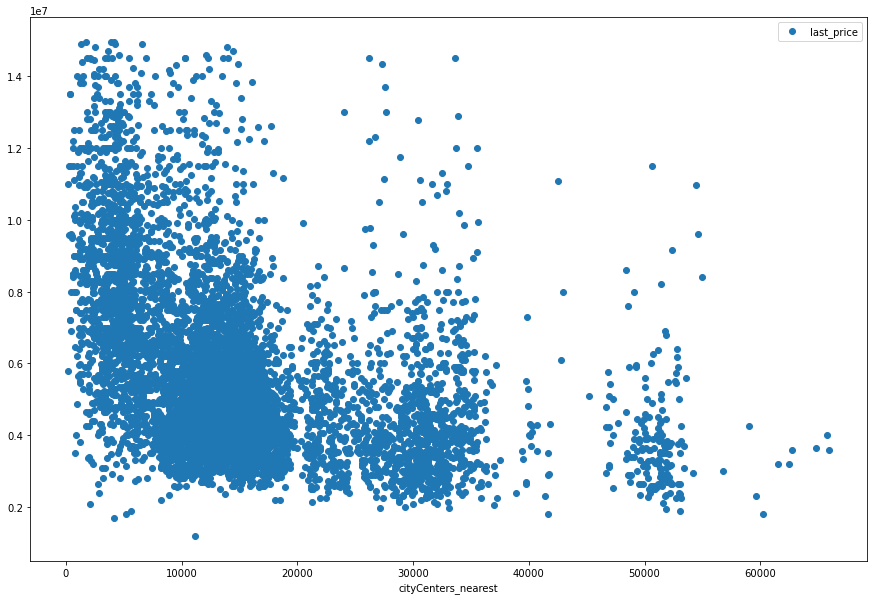

In [170]:
data_query.pivot_table(index = 'cityCenters_nearest', values = 'last_price').plot(style='o', figsize=(15, 10))
plt.show()

как и предполагалось квартиры дороже чем ближе к центру!

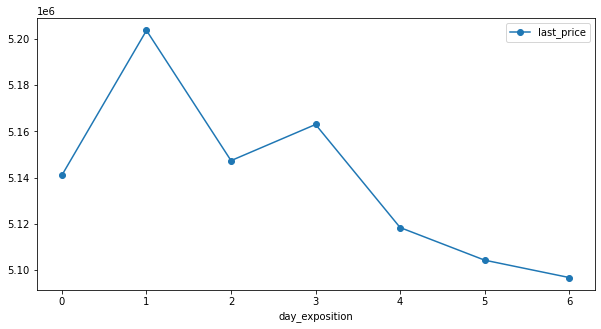

In [171]:
data_query.pivot_table(index = 'day_exposition', values = 'last_price').plot(style='o-', figsize=(10, 5))
plt.show()

дороже всего квартиры продаются во вторник, дешевле всего в воскресенье.

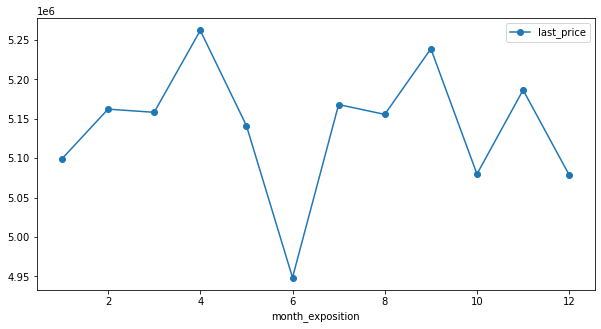

In [172]:
data_query.pivot_table(index = 'month_exposition', values = 'last_price').plot(style='o-', figsize=(10, 5))
plt.show()


на графике видно что цена подает сильно летом, в июне месяце самые недорогие продажи, а в апреле продают дороже всего 

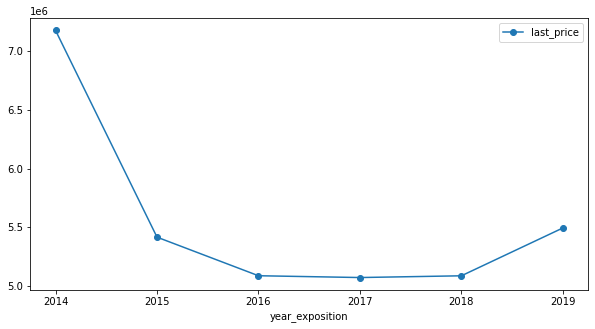

In [173]:
data_query.pivot_table(index = 'year_exposition', values = 'last_price').plot(style='o-', figsize=(10, 5))
plt.show()

из графика видно, что цена упала после 2014 года, а после 2018 начала  восстанавливаться.


In [138]:
ten_city = data_query['locality_name'].value_counts().head(10)
price_top10 = data_query.query('locality_name in @ten_city.index').pivot_table(index = 'locality_name', values = 'price_one_m2', aggfunc = 'median')
price_top10 = price_top10.astype(int)
price_top10.sort_values(by = 'price_one_m2', ascending = False)



,price_one_m2
locality_name,
Санкт-Петербург,102857
Пушкин,98601
Кудрово,92044
Парголово,91428
Мурино,86059
Шушары,76876
Колпино,74421
Гатчина,67860
Всеволожск,65789


Самая высокая стоимость жилья как и ожидалсь в Петербурге, а самая низкая в Выборге

In [139]:
data_query['to_center'] = data_query['cityCenters_nearest']/1000
data_query['to_center'] = data_query['to_center'].astype(int)


Нашли сколько км до центра, округлим до целого значения

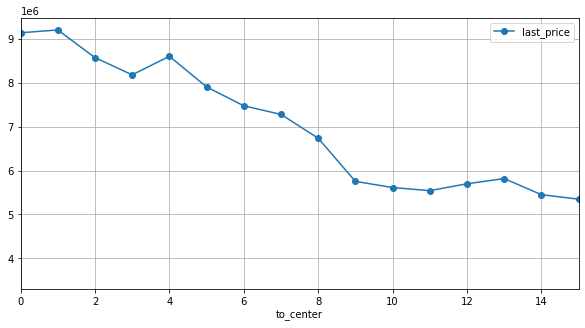

In [174]:
data_query.query('locality_name == "Санкт-Петербург"').pivot_table(index='to_center', values='last_price').plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
plt.show()

После 7 км от центра цена начианет резко падать, значит центр находится в пределах 7км

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера</b>

Да, 7 км нам хватит. :)
</div>

In [141]:
center_piter = data_query.query('locality_name == "Санкт-Петербург" and to_center<=7 ')


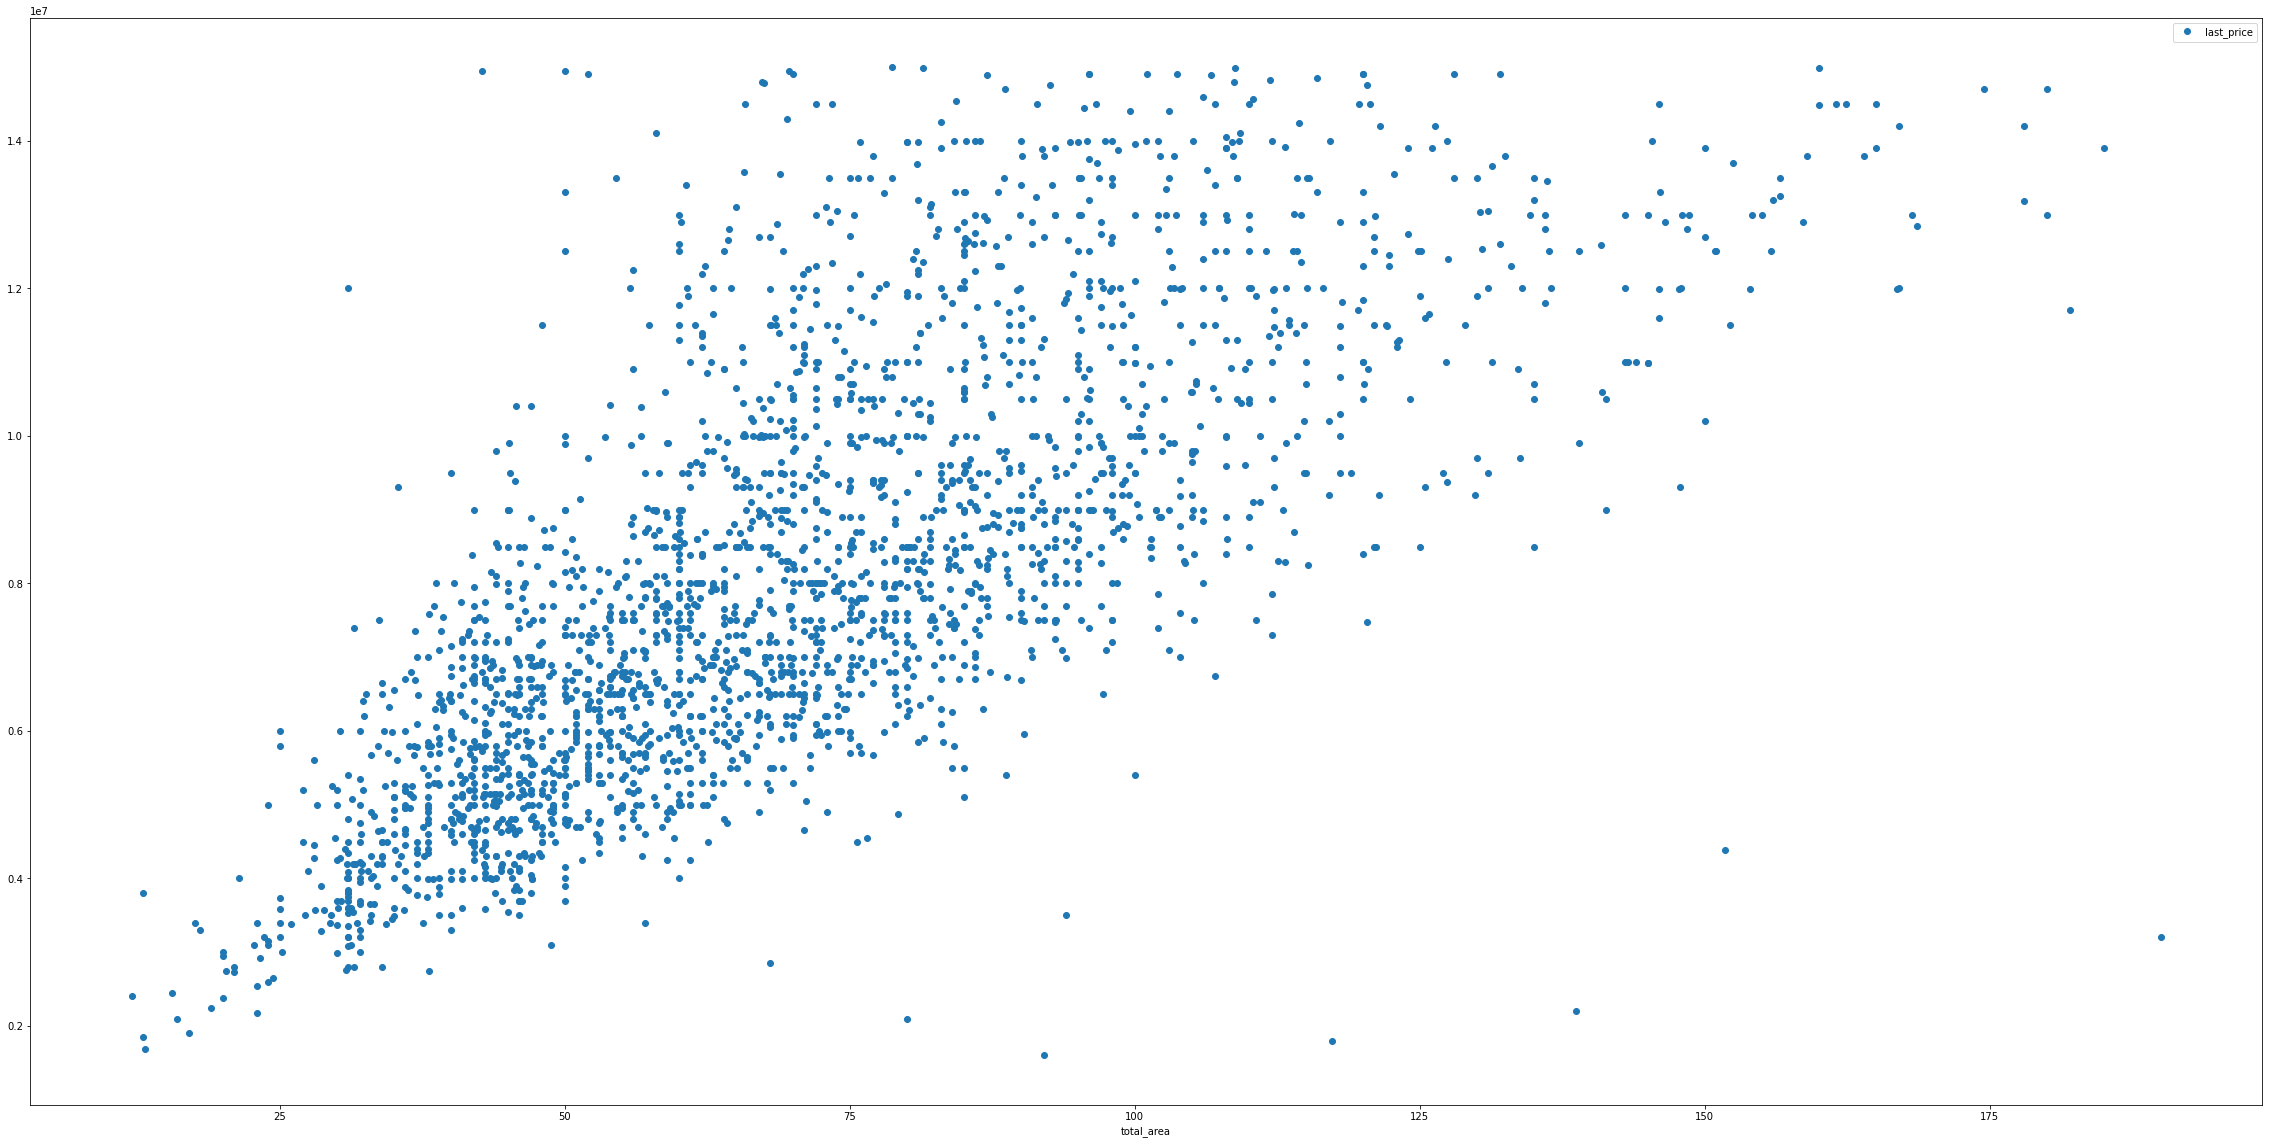

In [175]:
center_piter.plot( x = 'total_area', y = 'last_price', style = 'o', figsize=(40,20))
plt.show()

зависимость площади и цены такая же как и в общем срезе всех квартир 

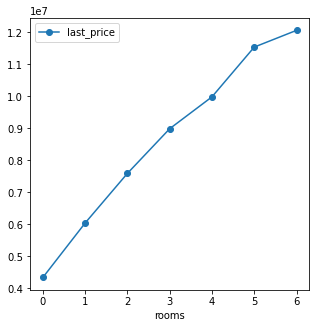

In [176]:
center_piter.pivot_table(index ='rooms', values = 'last_price').plot(style='o-', figsize=(5, 5))
plt.show()

так же цена растет и при росте кол-ва комнат


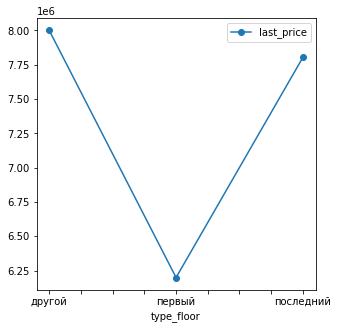

In [177]:
center_piter.pivot_table(index = 'type_floor', values = 'last_price', aggfunc = 'median').plot(style='o-', figsize=(5, 5))
plt.show()

а вот тут уже интереснее, последний этаж стоит примерно столько же как и другие, в центре дешелве первый этаж

In [145]:
print('Высота потолков (медиана):', data_query.query('locality_name == "Санкт-Петербург"')['ceiling_height'].median(),'\n')
print('Высота потолков в центре (медиана):', center_piter['ceiling_height'].median(),'\n')
print('Высота потолков (среднее):', data_query.query('locality_name == "Санкт-Петербург"')['ceiling_height'].mean(),'\n')
print('Высота потолков в центре (среднее):', center_piter['ceiling_height'].mean(),'\n')

Высота потолков (медиана): 2.65 

Высота потолков в центре (медиана): 2.75 

Высота потолков (среднее): 2.719368872104233 

Высота потолков в центре (среднее): 2.911165954139094 



в центре высота потолков выше

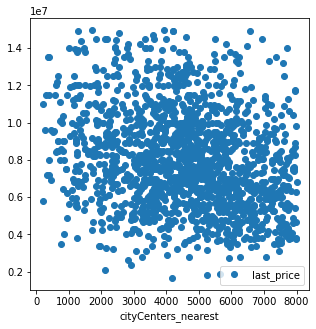

In [178]:
center_piter.pivot_table(index = 'cityCenters_nearest', values = 'last_price').plot(style='o', figsize=(5, 5))
plt.show()

Самые дорогие варианты квартир находятся в центре города, однако в центре также есть и достаточно дешёвые варианты.

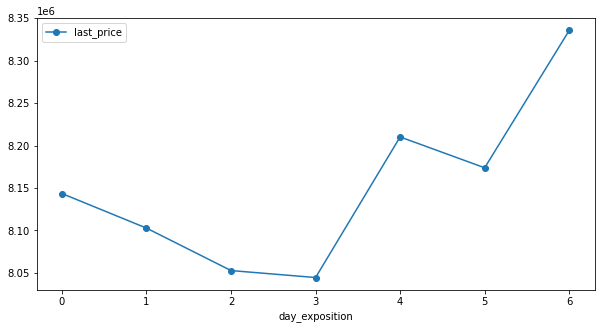

In [179]:
center_piter.pivot_table(index = 'day_exposition', values = 'last_price').plot(style='o-', figsize=(10, 5))
plt.show()

в центре дороже всего продаются квартиры в воскресенье   

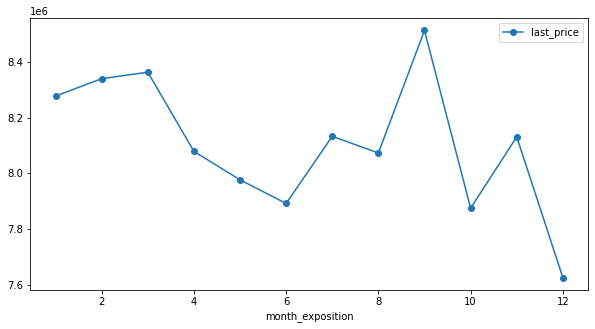

In [180]:
center_piter.pivot_table(index = 'month_exposition', values = 'last_price').plot(style='o-', figsize=(10, 5))
plt.show()

пик в октябре а самый большой спад в декабре 

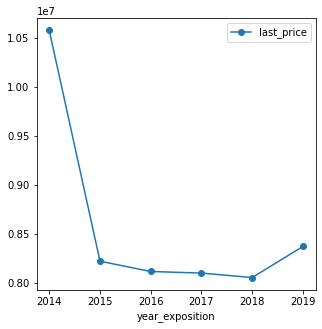

In [181]:
center_piter.pivot_table(index = 'year_exposition', values = 'last_price').plot(style='o-', figsize=(5, 5))
plt.show()

по годам ситуация не изменилась

выводы:

Зависимость цены квартиры от числа комнат в центре такая же, как и в целом по городу
В центре верхний этаж стоит практически столько же, сколько и другие этажи, кроме первого
В центральной зоне почти нет зависимости от удалённости от центра города. Стоимость даже немного повышается при удалении от центра - вероятно, это связано с расположением точки, которая является формальным центром города.
В центре значительно выше стоимость квартир, опубликованных в воскресенье и в сентябре 


## Общий вывод

Срок продажи квартиры

Чаще всего квартиру продают за 95 дней. Если меньше 45 дней, то это быстро, если дольше 230 дней - это долго.

Факторы, влияющие на стоимость

На стоимость больше влияет площадь квартиры, нежели число комнат. Т.е. могут быть дорогие квартиры с малым числом комнат, но где комнаты просторные.
Первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого.
Стоимость квадратного метра в топ-10 населённых пунктов

Дороже всего квадратный метр в Санкт-Петербурге - 102857
Дешевле всего квадратный метр в Выборге - 58233
Факторы, влияющие на стоимость в центре Санкт-Петербурга

В центре города практически нет разницы, насколько квартира удалена от условного центра города.
В центре города последний этаж практически не влияет на стоимость квартиры, в отличие от остального города.
В центре есть очень дорогие однокомнатные квартиры
Экономическая ситуация в стране мало влияет на элитную недвижимость в центре